# Data Setup and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sb
import numpy as np

employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']

nans = {}                                                 # prints the amount of NaNs in each column
for x in ep.columns:                                # 26 for Gender, 8 for Job_Satisfaction, 0 for the rest
	nans[x] = ep[x].isna().sum()      
print(nans)                                              
                                                               
gender_nan = ep['Gender'].isna()          # df of NaNs in Gender 
gender_nan_df = ep[gender_nan]
gender_nan_df

js_nan = ep['Job_Satisfaction'].isna()    # df of NaNs in Job_Satisfaction
js_nan_df = ep[js_nan]
js_nan_df

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

#Categorical variables get turned into numeric variables
ep['Retention_Status'] = ep['Retention_Status'].map({'Employed': 1, 'Left': 0})
ep['Education'] = ep['Education'].map({'Graduate Degree': 0, 'Bachelor Degree': 1, 'High School': 2})
ep['Department'] = ep['Department'].map({'Marketing': 0, 'Finance': 1, 'HR': 2, 'IT': 3, 'Sales': 4})
ep['Gender'] = ep['Gender'].map({'Female': 0, 'Male': 1})

{'Employee_ID': 0, 'Age': 0, 'Gender': 26, 'Education': 0, 'Department': 0, 'Salary': 0, 'Benefits_Package': 0, 'Years_at_Company': 0, 'Year': 0, 'Retention_Status': 0, 'Job_Satisfaction': 8, 'Performance_Score': 0, 'Training_Hours': 0}


# **1.1** - Describe the overall job satisfaction levels and performance scores using appropriate summary statistics and visualizations.

In [4]:
#Get summary statistics
ep.describe()

,Employee_ID,Age,Gender,Education,Department,Salary,Years_at_Company,Year,Retention_Status,Job_Satisfaction,Performance_Score,Training_Hours
count,2.670000e+02,267.000000,236.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,259.000000,267.000000,267.000000
mean,5.432632e+07,41.258427,0.504237,0.696629,2.378277,83257.288390,5.501873,2023.071161,0.629213,4.424710,2.704120,23.662921
std,2.538185e+07,6.387008,0.501045,0.667244,1.492833,16736.564106,3.695531,0.812607,0.483922,2.335504,1.405715,15.044253
min,1.039379e+07,30.000000,0.000000,0.000000,0.000000,55575.000000,0.000000,2022.000000,0.000000,1.000000,1.000000,0.000000
25%,3.025498e+07,36.000000,0.000000,0.000000,1.000000,67907.500000,3.000000,2022.000000,0.000000,3.000000,1.000000,10.000000
50%,5.650263e+07,40.000000,1.000000,1.000000,3.000000,86400.000000,5.000000,2023.000000,1.000000,4.000000,3.000000,24.000000
75%,7.548900e+07,45.000000,1.000000,1.000000,4.000000,97020.000000,8.000000,2024.000000,1.000000,6.000000,4.000000,37.000000
max,9.988378e+07,62.000000,1.000000,2.000000,4.000000,123420.000000,18.000000,2024.000000,1.000000,10.000000,5.000000,49.000000


In [5]:
#Visualizaitons

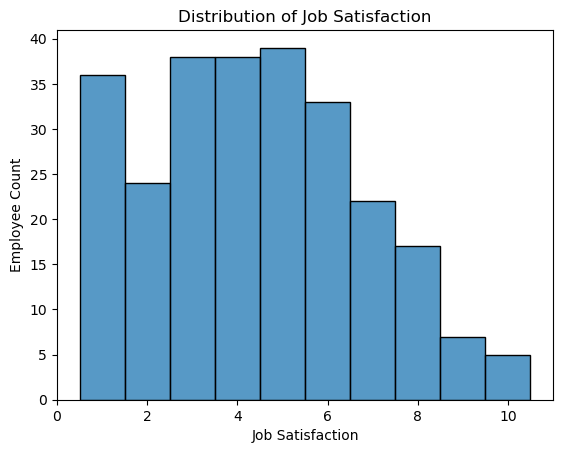

In [6]:
#Bar plot shows employee count for jobs satisfactions - skewed right
sb.histplot(data=ep, x='Job_Satisfaction', bins=len(ep['Job_Satisfaction'].unique()), discrete = True)
plt.xlabel('Job Satisfaction')
plt.ylabel('Employee Count')
plt.title('Distribution of Job Satisfaction')
plt.show()

In [7]:
ep['Job_Satisfaction'].describe()

count    259.000000
mean       4.424710
std        2.335504
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Job_Satisfaction, dtype: float64

In [8]:
# the distribution of job satisfaction among 259 employees is skewed right with a mean of 4.42 and a median of 4.0

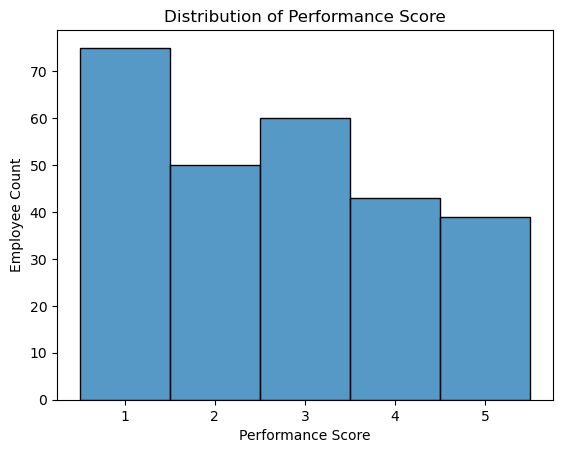

In [9]:
#Bar plot shows employee count for performance score- skewed left
sb.histplot(data=ep, x='Performance_Score', bins=len(ep['Performance_Score'].unique()), discrete=True)
plt.xlabel('Performance Score')
plt.ylabel('Employee Count')
plt.title('Distribution of Performance Score')
plt.show()

In [10]:
ep['Performance_Score'].describe()

count    267.000000
mean       2.704120
std        1.405715
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Performance_Score, dtype: float64

In [11]:
# the distribution of performance score among 267 employees is skewed left with a mean of 2.7 and median of 3.0

# **1.2** - Test if there is a significant difference in job satisfaction between employees who left and those who remained.

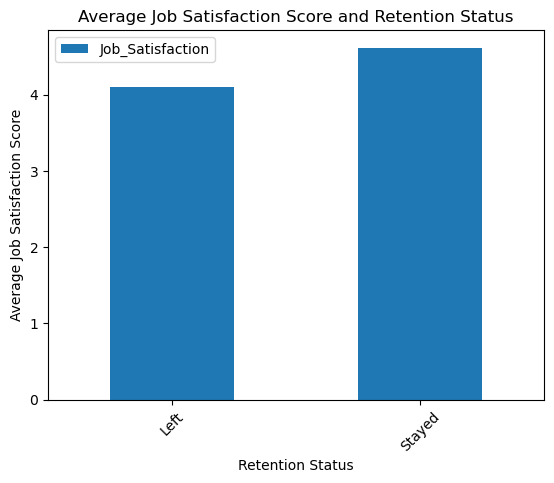

In [13]:
varNames = ['Job_Satisfaction', 'Retention_Status']
plot = ep[varNames].groupby('Retention_Status').mean().plot(kind = 'bar')
plot.set_xticklabels(['Left', 'Stayed'])
plt.ylabel('Average Job Satisfaction Score')
plt.xlabel('Retention Status')
plt.xticks(rotation=45)
plt.title('Average Job Satisfaction Score and Retention Status')
plt.show()
#People that stay have a higher average Job_Satisfaction than people that leave

In [14]:
ep.groupby('Retention_Status')['Job_Satisfaction'].mean()

Retention_Status
0    4.103093
1    4.617284
Name: Job_Satisfaction, dtype: float64

In [15]:
ep[ep['Retention_Status'] == 0]['Job_Satisfaction'].mean() - ep[ep['Retention_Status'] == 1]['Job_Satisfaction'].mean()

-0.5141911671121298

In [16]:
# employees that left the company have an average job satisfaction score of 4.1 out of 10,
# while employees that stayed have an average job satisfaction score of 4.62 out of 10

# employees that left had a job satisfaction score 0.51 out of 10 lower than those that stayed on average

In [17]:
model = smf.ols('Job_Satisfaction ~ Retention_Status', data=ep).fit()
model.summary()

#The p-value is 0.086, which is greater than 0.05. Therefore, Retention_Status is not statistically significant between people who leave and those who stay. 
#The R-squared value is 0.011, meaning that employee Retention_Status explains very little of the variation in Job_Satisfaction. The coefficient of 0.5142 
#indicates that, on average, employees who left have a Job_Satisfaction score 0.5142 points higher than those who remained.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Job_Satisfaction   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.963
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0864
Time:                        16:42:02   Log-Likelihood:                -585.21
No. Observations:                 259   AIC:                             1174.
Df Residuals:                     257   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.1031      0.236     17.369      0.000       3.638       4.568
Retention_Status     0.5142      0.299      1.721      0.086      -0.074       1.102
==============================================================================
Omnibus:                       12.357   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.507
Skew:                           0.258   Prob(JB):                       0.0234
Kurtosis:                       2.344   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(ep[['Job_Satisfaction', 'Retention_Status']].corr())

#Correlation of 0.106765 suggests a weak correlation between Job_Satisfaction and Retention_Status.

                  Job_Satisfaction  Retention_Status
Job_Satisfaction          1.000000          0.106765
Retention_Status          0.106765          1.000000


# **2.1** - Analyze how benefits package are related to job satisfaction and retention.

In [20]:
reg1 = smf.ols('Job_Satisfaction ~ Benefits_Package', data = ep).fit()
reg1.summary()
# univariate model that shows the relationship between Benefits_Package and Job_Satisfaction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Job_Satisfaction   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.12e-13
Time:                        16:42:03   Log-Likelihood:                -556.53
No. Observations:                 259   AIC:                             1119.
Df Residuals:                     256   BIC:                             1130.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.0758      0.257     11.974      0.000       2.570       3.582
Benefits_Package[T.Premium]      2.3045      0.311      7.413      0.000       1.692       2.917
Benefits_Package[T.Standard]     0.4340      0.389      1.116      0.266      -0.332       1.200
==============================================================================
Omnibus:                        7.514   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.554
Skew:                           0.418   Prob(JB):                       0.0229
Kurtosis:                       3.046   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

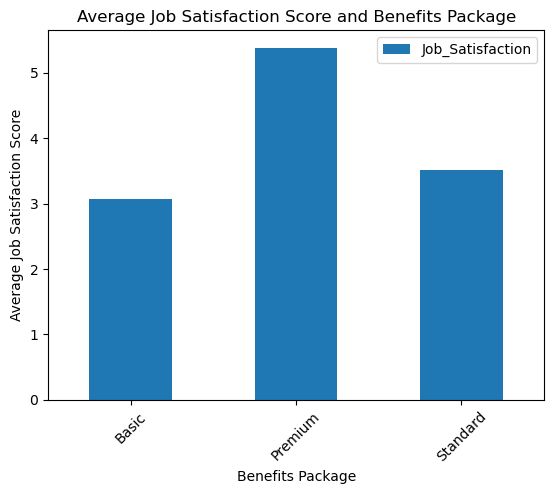

In [21]:
varNames = ['Job_Satisfaction', 'Benefits_Package']
plot = ep[varNames].groupby('Benefits_Package').mean().plot(kind = 'bar')
# plot.set_xticklabels(['Premium', 'Standard', 'Basic'])
plt.ylabel('Average Job Satisfaction Score')
plt.xlabel('Benefits Package')
plt.xticks(rotation=45)
plt.title('Average Job Satisfaction Score and Benefits Package')
plt.show()
# barplot showing the average Job_Satisfaction across each Benefits_Package

In [22]:
ep.groupby('Benefits_Package')['Job_Satisfaction'].mean()

Benefits_Package
Basic       3.075758
Premium     5.380282
Standard    3.509804
Name: Job_Satisfaction, dtype: float64

In [23]:
# the average job satisfaction score is
# 5.38/10 for employees with the premium benefits package
# 3.51/10 for employees with the standard package and
# 3.18/10 for employees with the basic package

In [24]:
ep_dummies_BP = pd.get_dummies(ep, columns=['Benefits_Package'])

reg2 = smf.ols('Retention_Status ~ Benefits_Package_Basic + Benefits_Package_Premium + Benefits_Package_Standard', data = ep_dummies_BP).fit()
reg2.summary()
# univariate model that shows the relationship between Benefits_Package and Retention_Status

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Retention_Status   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.854
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.159
Time:                        16:42:03   Log-Likelihood:                -182.70
No. Observations:                 267   AIC:                             371.4
Df Residuals:                     264   BIC:                             382.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.4538      0.024     18.602      0.000       0.406       0.502
Benefits_Package_Basic[T.True]        0.1731      0.048      3.585      0.000       0.078       0.268
Benefits_Package_Premium[T.True]      0.2152      0.037      5.790      0.000       0.142       0.288
Benefits_Package_Standard[T.True]     0.0655      0.053      1.230      0.220      -0.039       0.170
==============================================================================
Omnibus:                     1929.366   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.059
Skew:                          -0.528   Prob(JB):                     4.46e-10
Kurtosis:                       1.340   Cond. No.                     1.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

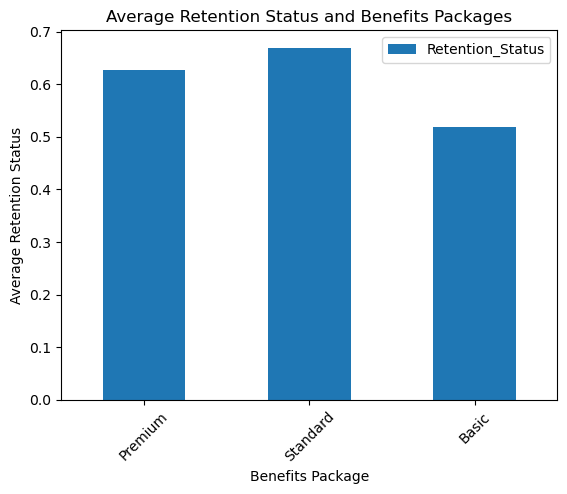

In [25]:
varNames = ['Retention_Status', 'Benefits_Package']
plot = ep[varNames].groupby('Benefits_Package').mean().plot(kind = 'bar')
plot.set_xticklabels(['Premium', 'Standard', 'Basic'])
plt.ylabel('Average Retention Status')
plt.xlabel('Benefits Package')
plt.xticks(rotation=45)
plt.title('Average Retention Status and Benefits Packages')
plt.show()
# barplot showing the average Retention_Status across each Benefits_Package

In [26]:
ep.groupby('Benefits_Package')['Retention_Status'].mean()

Benefits_Package
Basic       0.626866
Premium     0.668919
Standard    0.519231
Name: Retention_Status, dtype: float64

In [27]:
# 66.89% of employees with the premium benefits package stayed with the company
# along with 51.92% of those with the standard package
# and 62.89% of those with the basic package

In [28]:
ep['Benefits_Package'] = ep['Benefits_Package'].map({'Premium': 2, 'Standard': 1, 'Basic': 0})
model1 = smf.ols('Benefits_Package ~ Job_Satisfaction + Retention_Status', data = ep).fit()
model1.summary()
# multivariate model that shows the relationship between Benefits_Package with Job_Satisfaction and Retention_Status when they are constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Benefits_Package   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     30.66
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.15e-12
Time:                        16:42:03   Log-Likelihood:                -296.61
No. Observations:                 259   AIC:                             599.2
Df Residuals:                     256   BIC:                             609.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5826      0.115      5.088      0.000       0.357       0.808
Job_Satisfaction     0.1595      0.021      7.777      0.000       0.119       0.200
Retention_Status     0.0080      0.099      0.081      0.935      -0.186       0.203
==============================================================================
Omnibus:                       22.288   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.655
Skew:                          -0.543   Prob(JB):                     0.000147
Kurtosis:                       2.325   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **2.2** - Predict job satisfaction and retention.
**THERE ARE 4 PARTS TO THIS QUESTION**

In [30]:
employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']
ep.head(3)

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

ep_dummies = pd.get_dummies(ep, columns=['Education','Department', 'Benefits_Package', 'Gender'])
ep_dummies['Education_Bachelor_Degree'] = ep_dummies['Education_Bachelor Degree']
ep_dummies['Education_High_School'] = ep_dummies['Education_High School']
ep_dummies['Education_Graduate_Degree'] = ep_dummies['Education_Graduate Degree']
ep_dummies = ep_dummies.dropna()

## **PART 1 - Job Satisfaction Forward Selection:**

In [32]:
xVars = ['Age', 'Salary', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Gender_Female', 'Gender_Male', 'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

In [33]:
def findBestPredictor(xVars, xIncluded):
    r2Values = []

    if len(xIncluded) >= 1: #WHEN xIncluded is NOT EMPTY
        oldFormula = 'Job_Satisfaction ~ ' + ' + '.join(xIncluded)
        oldR2 = smf.ols(oldFormula, data = ep_dummies).fit().rsquared_adj
        
        for x in xVars:
            newFormula = 'Job_Satisfaction ~ ' + ' + '.join(xIncluded) + ' + ' + x
            r2 = smf.ols(newFormula, data = ep_dummies).fit().rsquared_adj
            r2Values.append(r2)
        
        maxR2 = max(r2Values)
        if maxR2 > oldR2:
            newX = xVars[r2Values.index(maxR2)]
            return newX
        else:
            return "stop"
    else: #WHEN xIncluded IS empty
        for x in xVars:
            newFormula = 'Job_Satisfaction ~ ' + x
            r2 = smf.ols(newFormula, data = ep_dummies).fit().rsquared_adj
            r2Values.append(r2)
        maxR2 = max(r2Values)
        newX = xVars[r2Values.index(maxR2)]
        return newX

In [34]:
def ForwardSelection(xVars):
    xIncluded = []
    newX = findBestPredictor(xVars, xIncluded)
    
    while newX != "stop":
        xIncluded.append(newX)
        xVars.remove(newX)
        newX = findBestPredictor(xVars, xIncluded)
        
    return xIncluded

In [35]:
ForwardSelection(xVars)

['Salary',
 'Years_at_Company',
 'Training_Hours',
 'Gender_Female',
 'Department_IT',
 'Department_Finance']

**SOLUTION PART 1 - Job Satisfaction Forward Selection Model**

In [37]:
js_fs_model = smf.ols('Job_Satisfaction ~ Salary + Years_at_Company + Training_Hours + Gender_Female + Department_IT + Department_Finance', data = ep_dummies).fit()
js_fs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Job_Satisfaction   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     24.05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.88e-22
Time:                        16:42:03   Log-Likelihood:                -528.07
No. Observations:                 259   AIC:                             1070.
Df Residuals:                     252   BIC:                             1095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3399      0.716      0.475      0.635      -1.071       1.750
Gender_Female[T.True]         -0.4111      0.242     -1.699      0.091      -0.888       0.065
Department_IT[T.True]         -0.3639      0.312     -1.167      0.244      -0.978       0.250
Department_Finance[T.True]     0.3488      0.336      1.037      0.301      -0.313       1.011
Salary                      4.201e-05   9.89e-06      4.246      0.000    2.25e-05    6.15e-05
Years_at_Company               0.2131      0.044      4.822      0.000       0.126       0.300
Training_Hours                -0.0164      0.008     -2.077      0.039      -0.032      -0.001
==============================================================================
Omnibus:                       12.630   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.253
Skew:                           0.549   Prob(JB):                      0.00132
Kurtosis:                       3.145   Cond. No.                     5.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **PART 2 - Job Satisfaction Backward Selection:**

In [39]:
xVars2 = ['Age', 'Salary', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Gender_Female', 'Gender_Male', 'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

import re

xToRemove = ''
while xToRemove != 'STOP':
    formula = 'Job_Satisfaction ~ ' + ' + '.join(xVars2)
    model = smf.ols(formula, data = ep_dummies).fit()
    
    # Drop Intercept and get p-values
    pvals = model.pvalues.drop('Intercept')

    # Map raw var names (with [T.True] etc.) to cleaned base names
    clean_names = [re.sub(r'\[T\..*?\]', '', name) for name in pvals.index]
    pval_dict = {}

    for clean, raw, val in zip(clean_names, pvals.index, pvals.values):
        # Only keep the lowest p-value for each base name
        if clean not in pval_dict or val > pval_dict[clean][1]:
            pval_dict[clean] = (raw, val)

    # Find max p-value and variable
    max_var, (_, max_pval) = max(pval_dict.items(), key=lambda item: item[1][1])

    if max_pval >= 0.05:
        print(f"Removing: {max_var} (p = {max_pval})")
        if max_var in xVars2:
            xVars2.remove(max_var)
        else:
            print(f"Warning: {max_var} not in xVars2")
        xToRemove = max_var
    else:
        xToRemove = 'STOP'

print("Final selected variables:")
print(xVars2)

Removing: Department_IT (p = 0.9280823553127415)
Removing: Performance_Score (p = 0.7802252502082652)
Removing: Salary (p = 0.6666499580520588)
Removing: Gender_Male (p = 0.8314613155892068)
Removing: Benefits_Package_Basic (p = 0.642679717838939)
Removing: Education_High_School (p = 0.723023343340415)
Removing: Education_Bachelor_Degree (p = 0.5521051324619406)
Removing: Education_Graduate_Degree (p = 0.6864005563807927)
Removing: Department_HR (p = 0.48165774941705475)
Removing: Department_Sales (p = 0.6129465012577038)
Removing: Department_Marketing (p = 0.42933010689039053)
Removing: Age (p = 0.3015434032116783)
Removing: Department_Finance (p = 0.3370615313360753)
Removing: Benefits_Package_Standard (p = 0.12470027351727249)
Removing: Training_Hours (p = 0.05313065209991348)
Final selected variables:
['Years_at_Company', 'Benefits_Package_Premium', 'Gender_Female']


**SOLUTION PART 2 - Job Satisfaction Backward Selection:**

In [41]:
js_bs_model_r2 = smf.ols('Job_Satisfaction ~ Years_at_Company + Benefits_Package_Premium + Gender_Female', data = ep_dummies).fit()
js_bs_model_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Job_Satisfaction   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     44.50
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.68e-23
Time:                        16:42:04   Log-Likelihood:                -532.18
No. Observations:                 259   AIC:                             1072.
Df Residuals:                     255   BIC:                             1087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.6566      0.239     11.116      0.000       2.186       3.127
Benefits_Package_Premium[T.True]     1.1880      0.275      4.322      0.000       0.647       1.729
Gender_Female[T.True]               -0.6447      0.239     -2.702      0.007      -1.115      -0.175
Years_at_Company                     0.2537      0.037      6.870      0.000       0.181       0.326
==============================================================================
Omnibus:                       13.416   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.042
Skew:                           0.556   Prob(JB):                     0.000893
Kurtosis:                       3.251   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **PART 3 - Retention Status Forward Selection:**

In [43]:
ep_dummies['Retention_Status'] = ep_dummies['Retention_Status'].map({'Employed': 1, 'Left': 0})

In [44]:
xVars3 = ['Age', 'Salary', 'Years_at_Company','Performance_Score',
       'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Gender_Female', 'Gender_Male','Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

In [45]:
def findBestPredictor2(xVars, xIncluded):
    r2Values = []
    for x in xVars:
        print("Trying: " + x)
        newFormula = 'Retention_Status ~ ' + x
        r2 = smf.ols(newFormula, data = ep_dummies).fit().rsquared_adj
        r2Values.append(r2)
    maxR2 = max(r2Values)
    newX = xVars[r2Values.index(maxR2)]
    return newX

In [46]:
def ForwardSelection2(xVars):
    xIncluded = []
    newX = findBestPredictor2(xVars, xIncluded)
    
    while newX != "stop":
        xIncluded.append(newX)
        xVars.remove(newX)
        newX = findBestPredictor(xVars, xIncluded)
        
    return xIncluded

In [47]:
ForwardSelection(xVars3)

['Salary',
 'Years_at_Company',
 'Training_Hours',
 'Gender_Female',
 'Department_IT',
 'Department_Finance']

**SOLUTION PART 2 - Retention Status Forward Selection Model**

In [49]:
rs_fs_model = smf.ols('Retention_Status ~ Salary + Years_at_Company + Training_Hours + Gender_Female + Department_IT + Department_Finance', data = ep_dummies).fit()
rs_fs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Retention_Status   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.267
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.273
Time:                        16:42:04   Log-Likelihood:                -175.71
No. Observations:                 259   AIC:                             365.4
Df Residuals:                     252   BIC:                             390.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.6073      0.184      3.305      0.001       0.245       0.969
Gender_Female[T.True]         -0.0650      0.062     -1.047      0.296      -0.187       0.057
Department_IT[T.True]         -0.0924      0.080     -1.155      0.249      -0.250       0.065
Department_Finance[T.True]    -0.1315      0.086     -1.524      0.129      -0.301       0.038
Salary                      2.963e-07   2.54e-06      0.117      0.907    -4.7e-06    5.29e-06
Years_at_Company               0.0135      0.011      1.195      0.233      -0.009       0.036
Training_Hours                -0.0007      0.002     -0.326      0.745      -0.005       0.003
==============================================================================
Omnibus:                     2051.331   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.244
Skew:                          -0.498   Prob(JB):                     3.01e-09
Kurtosis:                       1.373   Cond. No.                     5.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **PART 4 - Retention Status Backward Selection**

In [51]:
xVars3 = ['Age', 'Salary', 'Years_at_Company','Performance_Score',
       'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Gender_Female', 'Gender_Male', 'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

import re

xToRemove = ''
while xToRemove != 'STOP':
    formula = 'Retention_Status ~ ' + ' + '.join(xVars3)
    model = smf.ols(formula, data = ep_dummies).fit()
    
    # Drop Intercept and get p-values
    pvals = model.pvalues.drop('Intercept')

    # Map raw var names (with [T.True] etc.) to cleaned base names
    clean_names = [re.sub(r'\[T\..*?\]', '', name) for name in pvals.index]
    pval_dict = {}

    for clean, raw, val in zip(clean_names, pvals.index, pvals.values):
        # Only keep the lowest p-value for each base name
        if clean not in pval_dict or val > pval_dict[clean][1]:
            pval_dict[clean] = (raw, val)

    # Find max p-value and variable
    max_var, (_, max_pval) = max(pval_dict.items(), key=lambda item: item[1][1])

    if max_pval >= 0.05:
        print(f"Removing: {max_var} (p = {max_pval})")
        if max_var in xVars3:
            xVars3.remove(max_var)
        else:
            print(f"Warning: {max_var} not in xVars3")
        xToRemove = max_var
    else:
        xToRemove = 'STOP'

print("Final selected variables:")
print(xVars3)

Removing: Training_Hours (p = 0.8428086078934058)
Removing: Benefits_Package_Basic (p = 0.6094898986083066)
Removing: Performance_Score (p = 0.5148273988827106)
Removing: Benefits_Package_Standard (p = 0.33874379747855166)
Removing: Gender_Male (p = 0.5657186753731687)
Removing: Department_HR (p = 0.5434004475383478)
Removing: Department_Finance (p = 0.8737864991398818)
Removing: Department_IT (p = 0.6588363815541471)
Removing: Age (p = 0.4258704504634012)
Removing: Department_Marketing (p = 0.20155654262664155)
Removing: Salary (p = 0.1937667638109373)
Removing: Benefits_Package_Premium (p = 0.35326639145118777)
Removing: Gender_Female (p = 0.22549188711561968)
Removing: Education_Graduate_Degree (p = 0.06012443276259848)
Removing: Education_Bachelor_Degree (p = 0.8063030625261929)
Removing: Education_High_School (p = 0.35055075443414696)
Removing: Years_at_Company (p = 0.056154567034296984)
Final selected variables:
['Department_Sales']


**SOLUTION PART 4 - Retention Status Backward Selection Model**

In [53]:
rs_bs_model = smf.ols('Retention_Status ~ Department_Sales', data = ep_dummies).fit()
rs_bs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Retention_Status   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.135
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0243
Time:                        16:42:04   Log-Likelihood:                -176.99
No. Observations:                 259   AIC:                             358.0
Df Residuals:                     257   BIC:                             365.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5765      0.037     15.623      0.000       0.504       0.649
Department_Sales[T.True]     0.1426      0.063      2.266      0.024       0.019       0.267
==============================================================================
Omnibus:                     1866.054   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.798
Skew:                          -0.499   Prob(JB):                     1.38e-09
Kurtosis:                       1.331   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **3.1** - Investigate if there are significant differences between genders.
**We are using job_satisfaction, salary, benefits_package, years_at_company, and retention_status to see if gender is significant when trying to predict them. We can then determine if there is a significant difference between genders. Female: 0, Male: 1.**

## Part 1: How we determined our predictors

In [56]:
employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']

nans = {}                                                 # prints the amount of NaNs in each column
for x in ep.columns:                                # 26 for Gender, 8 for Job_Satisfaction, 0 for the rest
	nans[x] = ep[x].isna().sum()      
print(nans)                                              
                                                               
gender_nan = ep['Gender'].isna()          # df of NaNs in Gender 
gender_nan_df = ep[gender_nan]
gender_nan_df

js_nan = ep['Job_Satisfaction'].isna()    # df of NaNs in Job_Satisfaction
js_nan_df = ep[js_nan]
js_nan_df

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

#Categorical variables get turned into numeric variables
ep['Retention_Status'] = ep['Retention_Status'].map({'Employed': 1, 'Left': 0})
ep['Education'] = ep['Education'].map({'Graduate Degree': 0, 'Bachelor Degree': 1, 'High School': 2})
ep['Department'] = ep['Department'].map({'Marketing': 0, 'Finance': 1, 'HR': 2, 'IT': 3, 'Sales': 4})
ep['Benefits_Package'] = ep['Benefits_Package'].map({'Premium': 0, 'Standard': 1, 'Basic': 2})
ep['Gender'] = ep['Gender'].map({'Female': 0, 'Male': 1})

{'Employee_ID': 0, 'Age': 0, 'Gender': 26, 'Education': 0, 'Department': 0, 'Salary': 0, 'Benefits_Package': 0, 'Years_at_Company': 0, 'Year': 0, 'Retention_Status': 0, 'Job_Satisfaction': 8, 'Performance_Score': 0, 'Training_Hours': 0}


In [57]:
xVars3 = ['Education', 'Department', 'Salary', 'Benefits_Package', 'Years_at_Company', 'Job_Satisfaction', 'Performance_Score', 'Training_Hours', 'Retention_Status']

x_toTest = xVars3
x_included = []
runFlag = True
while runFlag:
    if len(x_included) == 0:
        r2 = []
        for j in x_toTest:
            formula = 'Gender ~ ' + j
            regR2 = smf.ols(formula, data =ep).fit().rsquared
            r2.append(regR2)
        maxR2 = max(r2)
        J = r2.index(maxR2)
        x_included.append(x_toTest[J])
        x_toTest.remove(x_toTest[J])
    else:
        r2 = []
        for i in x_toTest:
            formula = 'Gender ~ ' + ' +'.join(x_included + [i])
            regR2 = smf.ols(formula, data =ep).fit().rsquared_adj
            r2.append(regR2)
        if max(r2) > maxR2:
            maxR2 = max(r2)
            J = r2.index(maxR2)
            x_included.append(x_toTest[J])
            x_toTest.remove(x_toTest[J])
        else:
            runFlag = False

print(x_included)


['Salary', 'Benefits_Package', 'Years_at_Company', 'Department', 'Job_Satisfaction', 'Retention_Status', 'Performance_Score']


In [58]:
xVars2 = ['Education', 'Department', 'Salary', 'Benefits_Package', 'Years_at_Company', 'Job_Satisfaction', 'Performance_Score', 'Training_Hours', 'Retention_Status']

xToRemove = ''
while xToRemove != 'STOP':
    formula = 'Gender ~ ' + ' + '.join(xVars2)
    model = smf.ols(formula, data = ep).fit()
    
    # Drop Intercept and get p-values
    pvals = model.pvalues.drop('Intercept')

    # Map raw var names (with [T.True] etc.) to cleaned base names
    clean_names = [re.sub(r'\[T\..*?\]', '', name) for name in pvals.index]
    pval_dict = {}

    for clean, raw, val in zip(clean_names, pvals.index, pvals.values):
        # Only keep the lowest p-value for each base name
        if clean not in pval_dict or val > pval_dict[clean][1]:
            pval_dict[clean] = (raw, val)

    # Find max p-value and variable
    max_var, (_, max_pval) = max(pval_dict.items(), key=lambda item: item[1][1])

    if max_pval >= 0.05:
        print(f"Removing: {max_var} (p = {max_pval})")
        if max_var in xVars2:
            xVars2.remove(max_var)
        else:
            print(f"Warning: {max_var} not in xVars2")
        xToRemove = max_var
    else:
        xToRemove = 'STOP'

print("Final selected variables:")
print(xVars2)

Removing: Training_Hours (p = 0.48178122165603643)
Removing: Education (p = 0.41572201924579355)
Removing: Performance_Score (p = 0.2949360559857253)
Removing: Retention_Status (p = 0.28282241670345953)
Removing: Department (p = 0.10388850661312145)
Final selected variables:
['Salary', 'Benefits_Package', 'Years_at_Company', 'Job_Satisfaction']


**Our variables:** Salary, Benefits Package, Years at Company, and Job satisfaction appeared in both models so we will lok for significant differences between genders in these areas.

## Part 2: Our investigation into the variables we discovered

In [61]:
employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']
ep.head(3)

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

ep_dummies = pd.get_dummies(ep, columns=['Education','Department', 'Benefits_Package'])
ep_dummies['Education_Bachelor_Degree'] = ep_dummies['Education_Bachelor Degree']
ep_dummies['Education_High_School'] = ep_dummies['Education_High School']
ep_dummies['Education_Graduate_Degree'] = ep_dummies['Education_Graduate Degree']
ep_dummies = ep_dummies.dropna()

ep_dummies['Gender'] = ep_dummies['Gender'].map({'Female': 0, 'Male': 1})

**NO - Job Satisfaction: Is gender sigificant when predicting job satisfaction and keeping other confounding variables constant?**

In [63]:
#Job Satisfaction Model

from statsmodels.iolib.summary2 import summary_col


zVars = ['Age', 'Salary', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

cf = [] # save the confounding factors here
for i in zVars:
    # Estimating regressions
    reg1 = smf.ols('Job_Satisfaction ~ ' + i, data = ep_dummies).fit()
    reg2 = smf.ols('Gender ~ ' + i, data = ep_dummies).fit()
    
    # Extracting p-values
    reg1_pvalue = reg1.pvalues[reg1.pvalues.index.str.contains(i)].min()
    reg2_pvalue = reg2.pvalues[reg2.pvalues.index.str.contains(i)].min()

    # Checking if the variable is a confounding factor
    if (reg1_pvalue < 0.05) & (reg2_pvalue < 0.05):
        print(i, '√')
        cf.append(i)
    else:
        print(i, 'X')

regControlled = smf.ols('Job_Satisfaction ~ Gender + ' + " + ".join(cf), data = ep_dummies).fit()

regs = [reg1, reg2, regControlled]
summary_col(regs, stars = True, regressor_order = ["Intercept", "Gender"])

Age X
Salary √
Years_at_Company X
Performance_Score X
Training_Hours X
Department_Finance X
Department_HR X
Department_IT X
Department_Marketing X
Department_Sales X
Benefits_Package_Basic X
Benefits_Package_Premium X
Benefits_Package_Standard X
Education_Bachelor_Degree X
Education_High_School X
Education_Graduate_Degree X


,Job_Satisfaction I,Gender I,Job_Satisfaction II
Intercept,4.1579***,0.5263***,-1.6385**
,(0.1989),(0.0435),(0.6610)
Gender,,,0.1520
,,,(0.2644)
Education_Graduate_Degree[T.True],0.5474*,-0.0526,
,(0.3082),(0.0674),
Salary,,,0.0001***
,,,(0.0000)
R-squared,0.0138,0.0027,0.2777
R-squared Adj.,0.0094,-0.0017,0.2713


In [64]:
jsmodel = smf.ols('Job_Satisfaction ~ Gender + Salary', data = ep_dummies).fit()
jsmodel.summary() #Gender is NOT SIGNIFICANT when predicting job satisfaction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Job_Satisfaction   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     43.25
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.28e-16
Time:                        16:42:05   Log-Likelihood:                -476.33
No. Observations:                 228   AIC:                             958.7
Df Residuals:                     225   BIC:                             968.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6385      0.661     -2.479      0.014      -2.941      -0.336
Gender         0.1520      0.264      0.575      0.566      -0.369       0.673
Salary      7.112e-05   7.86e-06      9.054      0.000    5.56e-05    8.66e-05
==============================================================================
Omnibus:                       13.935   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.719
Skew:                           0.604   Prob(JB):                     0.000637
Kurtosis:                       3.302   Cond. No.                     4.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**YES - Salary: Is gender sigificant when predicting salary and keepng other confounding variables constant?**

In [66]:
#Salary Model

from statsmodels.iolib.summary2 import summary_col


zVars = ['Age', 'Job_Satisfaction', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']


cf = [] # save the confounding factors here
for i in zVars:
    # Estimating regressions
    reg1 = smf.ols('Salary ~ ' + i, data = ep_dummies).fit()
    reg2 = smf.ols('Gender ~ ' + i, data = ep_dummies).fit()
    
    # Extracting p-values
    reg1_pvalue = reg1.pvalues[reg1.pvalues.index.str.contains(i)].min()
    reg2_pvalue = reg2.pvalues[reg2.pvalues.index.str.contains(i)].min()

    # Checking if the variable is a confounding factor
    if (reg1_pvalue < 0.05) & (reg2_pvalue < 0.05):
        print(i, '√')
        cf.append(i)
    else:
        print(i, 'X')

regControlled = smf.ols('Salary ~ Gender ' + " + ".join(cf), data = ep_dummies).fit()

regs = [reg1, reg2, regControlled]
summary_col(regs, stars = True, regressor_order = ["Intercept", "Gender"])

Age X
Job_Satisfaction X
Years_at_Company X
Performance_Score X
Training_Hours X
Department_Finance X
Department_HR X
Department_IT X
Department_Marketing X
Department_Sales X
Benefits_Package_Basic X
Benefits_Package_Premium X
Benefits_Package_Standard X
Education_Bachelor_Degree X
Education_High_School X
Education_Graduate_Degree X


,Salary I,Gender I,Salary II
Intercept,81220.6767***,0.5263***,80773.4513***
,(1444.4923),(0.0435),(1567.4247)
Gender,,,5661.1226**
,,,(2207.0145)
Education_Graduate_Degree[T.True],5779.5970**,-0.0526,
,(2237.7979),(0.0674),
R-squared,0.0287,0.0027,0.0283
R-squared Adj.,0.0244,-0.0017,0.0240


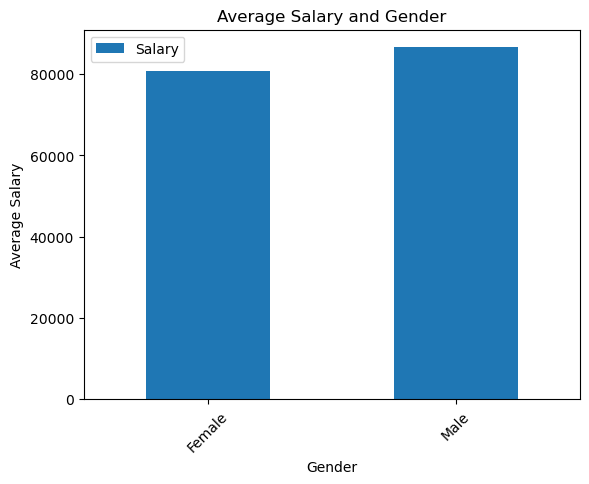

In [67]:
varNames = ['Salary', 'Gender']
plot = ep[varNames].groupby('Gender').mean().plot(kind = 'bar')
plot.set_xticklabels(['Female', 'Male'])
plt.xticks(rotation=45)
plt.ylabel('Average Salary')
plt.xlabel('Gender')
plt.title('Average Salary and Gender')
plt.show()
# barplot showing the average Salary between Genders

In [68]:
ep.groupby('Gender')['Salary'].mean()

Gender
Female    80888.461538
Male      86625.386555
Name: Salary, dtype: float64

In [69]:
ep[ep['Gender'] == 0]['Salary'].mean() - ep[ep['Gender'] == 1]['Salary'].mean()

nan

In [70]:
ep.groupby('Gender').size()

Gender
Female    117
Male      119
dtype: int64

In [71]:
# the 117 female employees at the company have an average salary of $80,888.46 while
# the 119 male employees have an average salary of $86,625.39

# on average, female employees earn $5,736.93 less than male employees at the company

In [72]:
salmodel = smf.ols('Salary ~ Gender', data = ep_dummies).fit()
salmodel.summary() #Gender IS SIGNIFICANT when predicting salary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.580
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0110
Time:                        16:42:05   Log-Likelihood:                -2538.9
No. Observations:                 228   AIC:                             5082.
Df Residuals:                     226   BIC:                             5089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.077e+04   1567.425     51.533      0.000    7.77e+04    8.39e+04
Gender      5661.1226   2207.015      2.565      0.011    1312.165       1e+04
==============================================================================
Omnibus:                      349.728   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.939
Skew:                           0.118   Prob(JB):                     0.000127
Kurtosis:                       1.646   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**YES - Benefits Package: Is gender sigificant when predicting benefits package and keepng other confounding variables constant?**

In [74]:
employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']
ep.head(3)

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

ep_dummies = pd.get_dummies(ep, columns=['Education','Department'])
ep_dummies['Education_Bachelor_Degree'] = ep_dummies['Education_Bachelor Degree']
ep_dummies['Education_High_School'] = ep_dummies['Education_High School']
ep_dummies['Education_Graduate_Degree'] = ep_dummies['Education_Graduate Degree']
ep_dummies = ep_dummies.dropna()

ep_dummies['Gender'] = ep_dummies['Gender'].map({'Female': 0, 'Male': 1})
ep_dummies['Benefits_Package'] = ep_dummies['Benefits_Package'].map({'Premium': 2, 'Standard': 1, 'Basic': 0})

In [75]:
# benefits package model

from statsmodels.iolib.summary2 import summary_col


zVars = ['Age', 'Salary', 'Job_Satisfaction', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales',
       'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']


cf = [] # save the confounding factors here
for i in zVars:
    # Estimating regressions
    reg1 = smf.ols('Benefits_Package ~ ' + i, data = ep_dummies).fit()
    reg2 = smf.ols('Gender ~ ' + i, data = ep_dummies).fit()
    
    # Extracting p-values
    reg1_pvalue = reg1.pvalues[reg1.pvalues.index.str.contains(i)].min()
    reg2_pvalue = reg2.pvalues[reg2.pvalues.index.str.contains(i)].min()

    # Checking if the variable is a confounding factor
    if (reg1_pvalue < 0.05) & (reg2_pvalue < 0.05):
        print(i, '√')
        cf.append(i)
    else:
        print(i, 'X')

regControlled = smf.ols('Benefits_Package ~ Gender + ' + " + ".join(cf), data = ep_dummies).fit()

regs = [reg1, reg2, regControlled]
summary_col(regs, stars = True, regressor_order = ["Intercept", "Gender"])

Age X
Salary √
Job_Satisfaction X
Years_at_Company X
Performance_Score X
Training_Hours X
Department_Finance X
Department_HR X
Department_IT X
Department_Marketing X
Department_Sales X
Education_Bachelor_Degree X
Education_High_School X
Education_Graduate_Degree X


,Benefits_Package I,Gender I,Benefits_Package II
Intercept,1.2030***,0.5263***,-2.2645***
,(0.0723),(0.0435),(0.1282)
Gender,,,-0.3736***
,,,(0.0513)
Education_Graduate_Degree[T.True],0.2391**,-0.0526,
,(0.1119),(0.0674),
Salary,,,0.0000***
,,,(0.0000)
R-squared,0.0198,0.0027,0.7953
R-squared Adj.,0.0154,-0.0017,0.7935


In [76]:
bpmodel = smf.ols('Benefits_Package ~ Gender + Salary', data = ep_dummies).fit()
bpmodel.summary() #Gender IS SIGNIFICANT when predicting benefits package and keeping confounding variables constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Benefits_Package   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     437.1
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.17e-78
Time:                        16:42:05   Log-Likelihood:                -102.40
No. Observations:                 228   AIC:                             210.8
Df Residuals:                     225   BIC:                             221.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2645      0.128    -17.663      0.000      -2.517      -2.012
Gender        -0.3736      0.051     -7.284      0.000      -0.475      -0.273
Salary      4.491e-05   1.52e-06     29.472      0.000    4.19e-05    4.79e-05
==============================================================================
Omnibus:                        3.054   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.172
Skew:                           0.026   Prob(JB):                        0.338
Kurtosis:                       2.525   Cond. No.                     4.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**YES - Years at Company: Is gender sigificant when predicting years at company and keepng other confounding variables constant?**

In [78]:
employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']
ep.head(3)

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

ep_dummies = pd.get_dummies(ep, columns=['Education','Department', 'Benefits_Package'])
ep_dummies['Education_Bachelor_Degree'] = ep_dummies['Education_Bachelor Degree']
ep_dummies['Education_High_School'] = ep_dummies['Education_High School']
ep_dummies['Education_Graduate_Degree'] = ep_dummies['Education_Graduate Degree']
ep_dummies = ep_dummies.dropna()

ep_dummies['Gender'] = ep_dummies['Gender'].map({'Female': 0, 'Male': 1})

In [79]:
#Years_at_Company Model

from statsmodels.iolib.summary2 import summary_col


zVars = ['Age', 'Salary','Job_Satisfaction', 'Years_at_Company','Performance_Score',
         'Training_Hours', 'Department_Finance', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Benefits_Package_Basic',
       'Benefits_Package_Premium', 'Benefits_Package_Standard',
       'Education_Bachelor_Degree', 'Education_High_School',
       'Education_Graduate_Degree']

cf = [] # save the confounding factors here
for i in zVars:
    # Estimating regressions
    reg1 = smf.ols('Years_at_Company ~ ' + i, data = ep_dummies).fit()
    reg2 = smf.ols('Gender ~ ' + i, data = ep_dummies).fit()
    
    # Extracting p-values
    reg1_pvalue = reg1.pvalues[reg1.pvalues.index.str.contains(i)].min()
    reg2_pvalue = reg2.pvalues[reg2.pvalues.index.str.contains(i)].min()

    # Checking if the variable is a confounding factor
    if (reg1_pvalue < 0.05) & (reg2_pvalue < 0.05):
        print(i, '√')
        cf.append(i)
    else:
        print(i, 'X')

regControlled = smf.ols('Years_at_Company ~ Gender + ' + " + ".join(cf), data = ep_dummies).fit()

regs = [reg1, reg2, regControlled]
summary_col(regs, stars = True, regressor_order = ["Intercept", "Gender"])

Age X
Salary √
Job_Satisfaction X
Years_at_Company X
Performance_Score X
Training_Hours X
Department_Finance X
Department_HR X
Department_IT X
Department_Marketing X
Department_Sales X
Benefits_Package_Basic X
Benefits_Package_Premium X
Benefits_Package_Standard X
Education_Bachelor_Degree X
Education_High_School X
Education_Graduate_Degree X


,Years_at_Company I,Gender I,Years_at_Company II
Intercept,4.9474***,0.5263***,-7.1610***
,(0.3194),(0.0435),(0.8935)
Gender,,,-1.1137***
,,,(0.3574)
Education_Graduate_Degree[T.True],1.3053***,-0.0526,
,(0.4948),(0.0674),
Salary,,,0.0002***
,,,(0.0000)
R-squared,0.0299,0.0027,0.4964
R-squared Adj.,0.0256,-0.0017,0.4919


In [80]:
yacmodel = smf.ols('Years_at_Company ~ Gender + Salary', data = ep_dummies).fit()
yacmodel.summary() #Gender IS SIGNIFICANT when predicting years at company

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Years_at_Company   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     110.9
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.04e-34
Time:                        16:42:05   Log-Likelihood:                -545.05
No. Observations:                 228   AIC:                             1096.
Df Residuals:                     225   BIC:                             1106.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1610      0.893     -8.015      0.000      -8.922      -5.400
Gender        -1.1137      0.357     -3.116      0.002      -1.818      -0.409
Salary         0.0002   1.06e-05     14.880      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.805
Skew:                           0.350   Prob(JB):                       0.0905
Kurtosis:                       2.878   Cond. No.                     4.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **3.2** - Compare job satisfaction and retention rates across different departments.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sb
import numpy as np

employee_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/employee_data.csv'
retention_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/retention_data.csv'
satisfaction_path = '/Users/greysongrant/Desktop/Spring 25/BA222/Project/Proj Data/satisfaction_data.csv'

ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']             #Create dataframe with all variables
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']

nans = {}                                                 # prints the amount of NaNs in each column
for x in ep.columns:                                # 26 for Gender, 8 for Job_Satisfaction, 0 for the rest
	nans[x] = ep[x].isna().sum()      
print(nans)                                              
                                                               
gender_nan = ep['Gender'].isna()          # df of NaNs in Gender 
gender_nan_df = ep[gender_nan]
gender_nan_df

js_nan = ep['Job_Satisfaction'].isna()    # df of NaNs in Job_Satisfaction
js_nan_df = ep[js_nan]
js_nan_df

ep['Gender'] = ep['Gender'].replace('Non-binary', np.nan)

#Categorical variables get turned into numeric variables
ep['Retention_Status'] = ep['Retention_Status'].map({'Employed': 1, 'Left': 0})
ep['Education'] = ep['Education'].map({'Graduate Degree': 0, 'Bachelor Degree': 1, 'High School': 2})
ep['Department'] = ep['Department'].map({'Marketing': 0, 'Finance': 1, 'HR': 2, 'IT': 3, 'Sales': 4})
ep['Benefits_Package'] = ep['Benefits_Package'].map({'Premium': 0, 'Standard': 1, 'Basic': 2})
ep['Gender'] = ep['Gender'].map({'Female': 0, 'Male': 1})

ep['Gender'] = ep['Gender'].map({0: 'Female', 1: 'Male'})
ep['Department'] = ep['Department'].map({0: 'Marketing', 1: 'Finance', 2: 'HR', 3: 'IT', 4: 'Sales'})

{'Employee_ID': 0, 'Age': 0, 'Gender': 26, 'Education': 0, 'Department': 0, 'Salary': 0, 'Benefits_Package': 0, 'Years_at_Company': 0, 'Year': 0, 'Retention_Status': 0, 'Job_Satisfaction': 8, 'Performance_Score': 0, 'Training_Hours': 0}


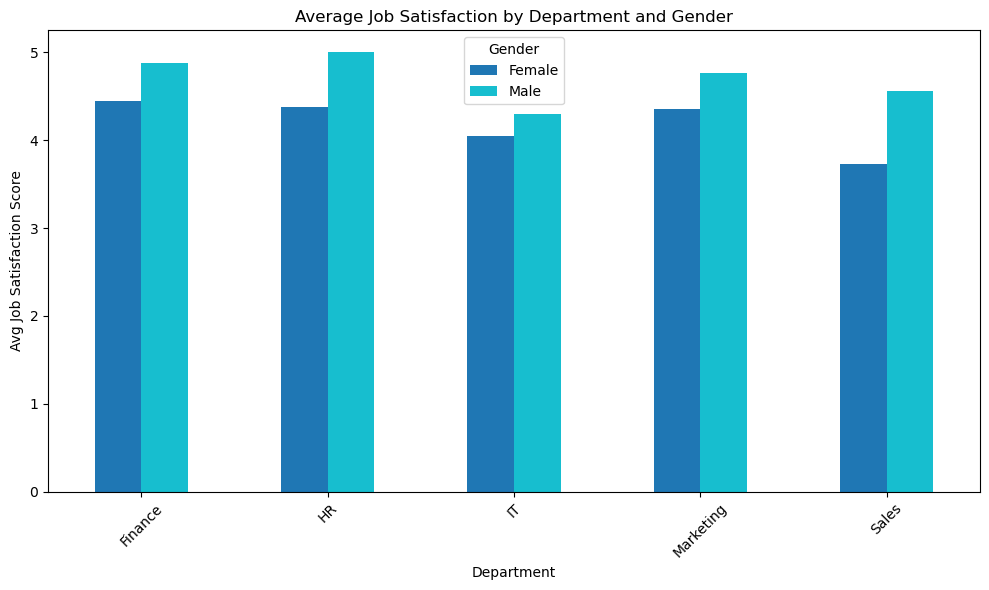

In [83]:
pivot_department = (
    ep.groupby(['Department', 'Gender'])['Job_Satisfaction']
    .mean()
    .unstack()# Gender becomes columns
)

pivot_department.plot(kind='bar', figsize=(10,6), colormap='tab10')

plt.title('Average Job Satisfaction by Department and Gender')
plt.ylabel('Avg Job Satisfaction Score')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [84]:
ep.groupby('Department')['Job_Satisfaction'].mean()

Department
Finance      4.875000
HR           4.512821
IT           4.170213
Marketing    4.795455
Sales        4.134831
Name: Job_Satisfaction, dtype: float64

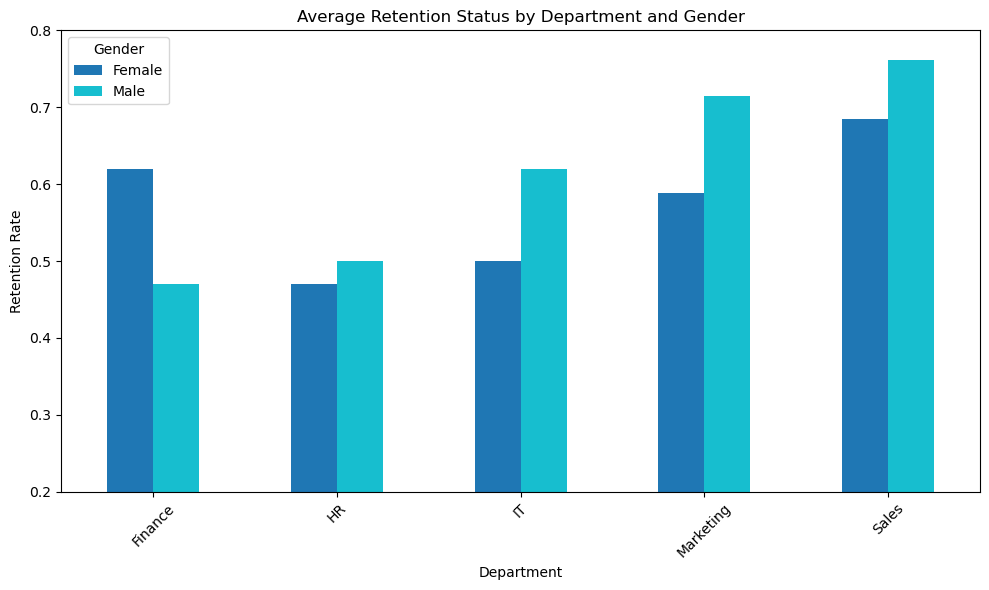

In [85]:
pivot_department = (
    ep.groupby(['Department', 'Gender'])['Retention_Status']
    .mean()
    .unstack()  # Gender becomes columns
)

pivot_department.plot(kind='bar', figsize=(10,6), colormap='tab10')

plt.title('Average Retention Status by Department and Gender')
plt.ylabel('Retention Rate')
plt.xlabel('Department')
plt.ylim(0.2,0.8)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [86]:
ep.groupby('Department')['Retention_Status'].mean()

Department
Finance      0.523810
HR           0.536585
IT           0.591837
Marketing    0.659091
Sales        0.725275
Name: Retention_Status, dtype: float64

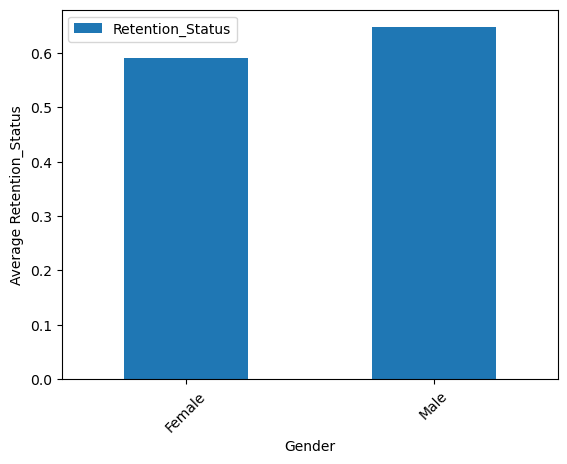

In [87]:
varNames = ['Retention_Status', 'Gender']
plot = ep[varNames].groupby('Gender').mean().plot(kind = 'bar')
plot.set_xticklabels(['Female', 'Male'])
plt.xticks(rotation=45)
plt.ylabel('Average Retention_Status')
plt.xlabel('Gender')
plt.show()
# barplot showing the average Retention Status between Genders

In [88]:
ep.groupby('Gender')['Retention_Status'].mean()

Gender
Female    0.589744
Male      0.647059
Name: Retention_Status, dtype: float64

In [89]:
ep.groupby('Gender').size()

Gender
Female    117
Male      119
dtype: int64

In [90]:
ep.groupby('Gender')['Retention_Status'].mean()

Gender
Female    0.589744
Male      0.647059
Name: Retention_Status, dtype: float64

In [91]:
ep['Gender'] = ep['Gender'].map({'Female': 0, 'Male': 1})
ep[ep['Gender'] == 0]['Retention_Status'].mean() - ep[ep['Gender'] == 1]['Retention_Status'].mean()

-0.05731523378582204

In [92]:
# the 117 female employees have an average retention status of 58.97%
# the 119 male employees have an average retention status of 64.70%

# female employees stay at the company 5.73% less than male employees on average

In [93]:
rsmodel = smf.ols('Retention_Status ~ Gender', data = ep).fit()
rsmodel.summary() #Gender is NOT SIGNIFICANT when predicting retention status

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Retention_Status   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8173
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.367
Time:                        16:42:06   Log-Likelihood:                -164.04
No. Observations:                 236   AIC:                             332.1
Df Residuals:                     234   BIC:                             339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5897      0.045     13.100      0.000       0.501       0.678
Gender         0.0573      0.063      0.904      0.367      -0.068       0.182
==============================================================================
Omnibus:                     1547.449   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.371
Skew:                          -0.486   Prob(JB):                     2.82e-09
Kurtosis:                       1.251   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Additional Graphs for Conclusion

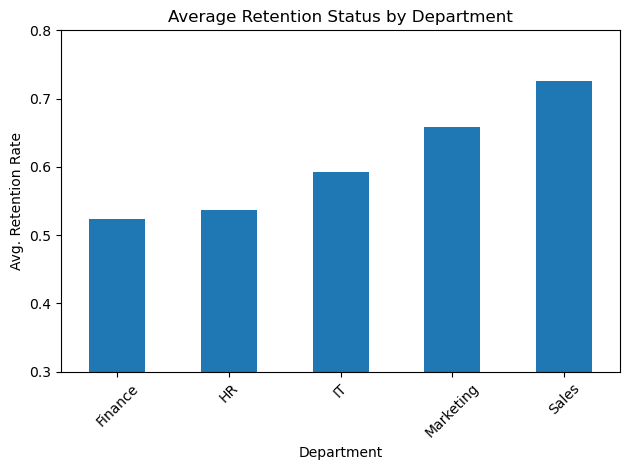

In [95]:
pivot_department = (
    ep.groupby(['Department'])['Retention_Status']
    .mean()  # Gender becomes columns
)

pivot_department.plot(kind='bar', colormap='tab10')

plt.title('Average Retention Status by Department')
plt.ylabel('Avg. Retention Rate')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0.3, 0.8)
plt.show()
#plt.savefig("my_graph.png", transparent=True)

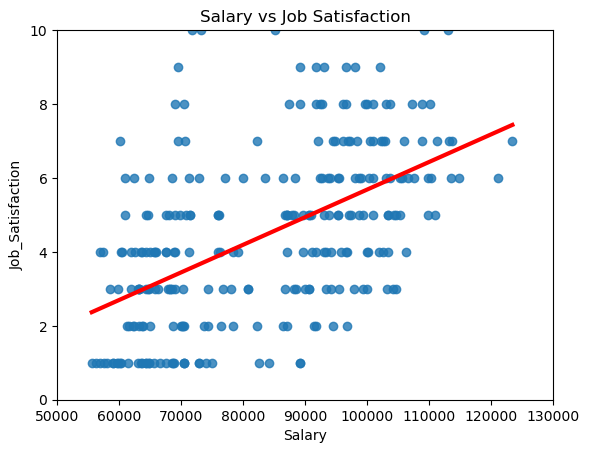

In [96]:
sb.regplot(x='Salary', y='Job_Satisfaction', data=ep, line_kws={'color': 'red', 'linewidth': 3}, ci = None)
plt.title('Salary vs Job Satisfaction')
plt.ylim(0, 10)  # Adjust based on your y range
plt.xlim(50000, 130000)  # Adjust to focus where most data lies
plt.show()
#plt.savefig("Salary vs Job Satisfaction with Regression Line.png", transparent=True)

In [97]:
ep = pd.read_csv(employee_path)
rt = pd.read_csv(retention_path)
st = pd.read_csv(satisfaction_path)

ep['Retention_Status'] = rt['Retention_Status']
ep['Job_Satisfaction'] = st['Job_Satisfaction']
ep['Performance_Score'] = st['Performance_Score']
ep['Training_Hours'] = st['Training_Hours']

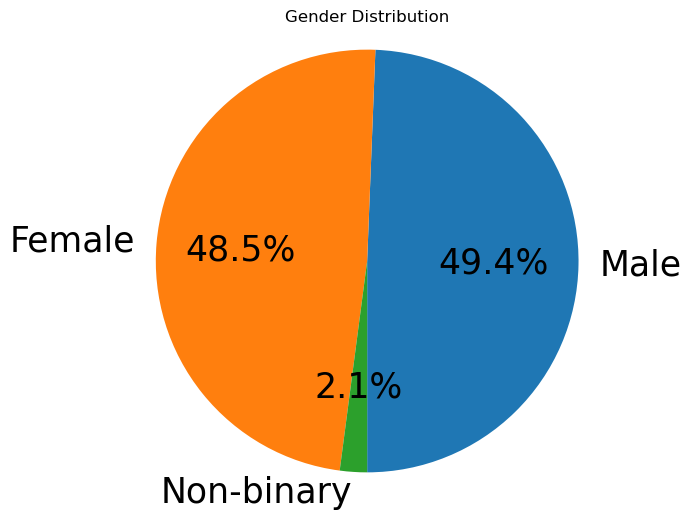

In [98]:
gender_counts = ep['Gender'].value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',startangle=-90,textprops={'fontsize': 25}) #asked chatGPT how to do this
plt.title('Gender Distribution')
plt.axis('equal')
# plt.show()
plt.savefig("Gender Distribution.png", transparent=True)

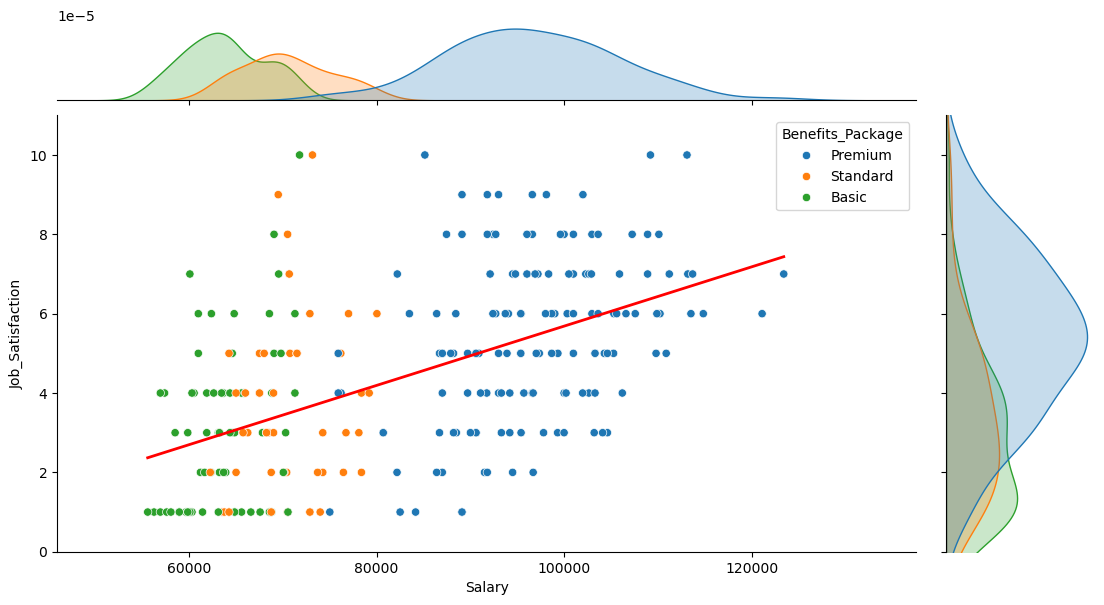

In [99]:
g = sb.jointplot(
    data=ep, 
    x="Salary", 
    y="Job_Satisfaction", 
    hue="Benefits_Package", 
    kind="scatter"
)

g.fig.set_size_inches(12, 6)

# Add a red regression line to the main plot
sb.regplot(
    data=ep, 
    x="Salary", 
    y="Job_Satisfaction", 
    scatter=False,       # So we don't duplicate points
    ax=g.ax_joint,       # This targets the center scatterplot
    color="red", 
    line_kws={"linewidth": 2},
    ci = None
)

#plt.title('Salary, Benefits Package, and Job Satisfaction')
plt.ylim(0,11)
plt.show()
# plt.savefig('Salary, Benefits Package, and Job Satisfaction', transparent=True)